In [13]:
!pip install wordcloud
!pip install gTTs
!pip install playsound

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from skimage import io

In [5]:
pd.set_option('display.max_colwidth', -1)

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_15944\3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [9]:
import collections
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from tqdm import tqdm
from PIL import Image

from gtts import gTTS
from playsound import playsound
from IPython import display

## Data Understanding

1. Import the dataset and read image & captions into two separate variables.
2. Visualize both images and text present in dataset.
3. Create word-to-index and index-to-word mappings.
4. Create a dataframe which summarizes the image, path and captions as a dataframe.
5. Visualize top 30 occuring words in the captions.
6. Create a list which contains all the captions and path.

In [11]:
# Import the dataset and read the image into a separate variable.

images = 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images'

all_imgs = glob.glob(images + '/*.jpg', recursive=True)
print("Total images present in dataset: {}".format(len(all_imgs)))

Total images present in dataset: 8091


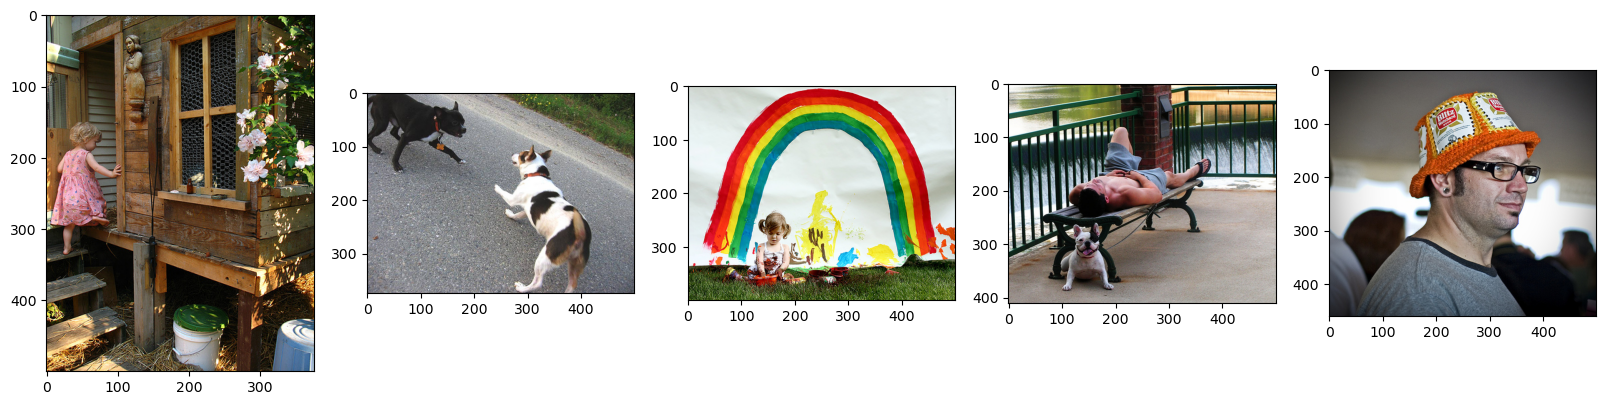

In [14]:
# Visualize the first five images

Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1, 5)
figure.set_figwidth(20)

for ax, image in zip(axes, Display_Images):
    ax.imshow(io.imread(image), cmap=None)

In [16]:
text_file = 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/captions.txt'

def load_doc(text_file):
    
    open_file = open(text_file, 'r', encoding='latin-1')
    text = open_file.read()
    print(text)
    open_file.close()
    return text

doc = load_doc(text_file)
print(doc[:100])


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
all_imgs

['E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1000268201_693b08cb0e.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1001773457_577c3a7d70.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1002674143_1b742ab4b8.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1003163366_44323f5815.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1007129816_e794419615.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1007320043_627395c3d8.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1009434119_febe49276a.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1012212859_01547e3f17.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images\\1015118661_980735411b.jpg',
 'E:/projects/Data_Science/Sample_project1/Eye_for_the_

In [19]:
image_path = 'E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images'
all_img_id = []
all_img_vector = []
annotations = []

with open('E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/captions.txt', 'r') as fo:
    next(fo)
    for line in fo:
        split_arr = line.split(',')
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1].rstrip('\n.'))
        all_img_vector.append(image_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector, annotations)), columns=['ID', 'Path', 'Captions']) 

df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way
1,1000268201_693b08cb0e.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images1000268201_693b08cb0e.jpg,A girl going into a wooden building
2,1000268201_693b08cb0e.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse
4,1000268201_693b08cb0e.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin
...,...,...,...
40450,997722733_0cb5439472.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images997722733_0cb5439472.jpg,A man is rock climbing high in the air
40452,997722733_0cb5439472.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock face covered in assist handles
40453,997722733_0cb5439472.jpg,E:/projects/Data_Science/Sample_project1/Eye_for_the_blind/Dataset/Images997722733_0cb5439472.jpg,A rock climber in a red shirt
